<a href="https://colab.research.google.com/github/Husseinbnahmed/Fun-with-Data/blob/main/VIF_Multicollinearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd 
#Importing Personal Finance Dataset Dummied by a secret factor 
df = pd.read_excel("Python Dataset.xlsx").fillna(0)

df

,Bank Fees,Cars,Commute,Consignment,Eating Out,Education,Entertainment,Food Supply,Gifts,Giving Back,Government,Gym,Health,Home,Home,Investing Insights,Mattress Firm,Night Outs,Online Shopping,Orders for Others,Personal Care,Re-payments,Retail Shopping,Ride Sharing,Self Investment,Subscriptions,Tax,Travel,Utilities,Grand Total
0,0.00,554.67,365.23,0.00,850.87,0.00,78.00,217.72,124.86,20.0,76.50,0.00,48.59,1812.39,0.00,0.00,0.0,334.98,51.16,0.00,30.00,0.00,103.39,265.36,0.00,209.31,0.0,116.00,45.68,5304.71
1,0.00,559.67,176.67,0.00,547.08,0.00,0.00,200.19,547.00,0.0,0.00,0.00,13.99,1810.00,0.00,0.00,0.0,337.54,98.44,0.00,148.00,0.00,188.96,58.26,0.00,209.31,0.0,1609.63,68.80,6573.54
2,100.00,1085.13,357.97,0.00,639.58,0.00,0.00,105.90,0.00,0.0,60.00,0.00,260.53,1810.00,0.00,0.00,0.0,270.23,13.85,0.00,100.00,0.00,436.78,82.79,15.94,211.44,0.0,0.00,80.25,5630.39
3,36.50,679.67,435.16,0.00,1081.14,0.00,34.00,271.41,104.85,0.0,0.00,0.00,120.82,2025.30,0.00,0.00,0.0,473.56,24.40,0.00,115.00,0.00,130.44,79.64,0.00,211.35,0.0,0.00,65.83,5889.07
4,0.00,570.99,391.64,0.00,1244.65,0.00,0.00,114.75,160.00,0.0,0.00,0.00,19.33,1810.00,0.00,0.00,0.0,115.28,104.15,0.00,203.30,0.00,86.59,132.36,0.00,211.35,0.0,106.99,33.88,5305.26
5,9.00,568.41,326.50,0.00,1018.36,0.00,4.28,187.43,48.22,0.0,0.00,0.00,63.35,1810.00,0.00,0.00,0.0,739.16,113.85,182.00,335.00,-457.00,520.66,399.67,0.00,211.35,0.0,0.00,35.92,6116.16
6,6.00,1046.92,273.44,0.00,1392.97,0.00,0.00,82.07,40.00,0.0,0.00,0.00,190.02,1810.00,0.00,0.00,0.0,1095.18,101.32,0.00,124.00,-100.00,390.12,182.27,15.94,211.77,0.0,453.50,47.11,7362.63
7,56.00,566.07,120.00,0.00,349.67,0.00,0.00,0.00,263.32,0.0,0.00,0.00,89.97,1810.00,0.00,0.00,0.0,32.00,0.00,0.00,301.25,0.00,384.54,92.94,0.00,105.50,0.0,2250.86,89.42,6511.54
8,3.00,675.82,487.74,0.00,1181.56,231.52,0.00,141.19,58.23,10.0,73.00,0.00,44.93,1810.00,0.00,0.00,0.0,300.02,153.23,85.00,159.15,-0.55,906.75,223.99,0.00,318.31,0.0,316.91,36.85,7216.65
9,123.52,577.41,350.49,0.00,1452.45,0.00,305.49,319.94,9.12,0.0,25.70,0.00,679.03,1810.00,0.00,0.00,0.0,307.56,134.63,0.00,300.30,0.00,594.72,142.15,20.14,211.82,0.0,0.00,56.27,7420.74


In [ ]:

#list of column names 
columns = list(df.columns)[:14]

print(columns)

['Bank Fees', 'Cars', 'Commute', 'Consignment', 'Eating Out', 'Education', 'Entertainment ', 'Food Supply', 'Gifts', 'Giving Back', 'Government ', 'Gym ', 'Health ', 'Home']


In [ ]:
#test for multicollinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[columns]

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns 

vif_data['VIF'] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))]


print(vif_data)

           Feature         VIF
0        Bank Fees    6.135149
1             Cars   59.078169
2          Commute    8.578454
3      Consignment    2.446042
4       Eating Out   17.833613
5        Education    2.964897
6   Entertainment    10.256062
7      Food Supply   14.625099
8            Gifts    6.735443
9      Giving Back    2.107312
10     Government     3.898180
11            Gym     3.218218
12         Health    19.510606
13            Home  104.309400


In [ ]:
#More testing for Multicollinearity 
X2 = df[[ 'Food Supply', 'Travel', 'Eating Out']]
Y = df[['Grand Total']]
X3 = df[['Food Supply', 'Travel', 'Eating Out']]

vif2 = pd.DataFrame()
vif2['Feature'] = X2.columns
vif2['VIF'] = [variance_inflation_factor(X2.values, i) 
                          for i in range(len(X2.columns))]

vif2

,Feature,VIF
0,Food Supply,2.625139
1,Travel,1.460485
2,Eating Out,3.260058


In [ ]:
len(df.columns)

30

In [ ]:
df.columns


Index(['Bank Fees', 'Cars', 'Commute', 'Consignment', 'Eating Out',
       'Education', 'Entertainment ', 'Food Supply', 'Gifts', 'Giving Back',
       'Government ', 'Gym ', 'Health ', 'Home', 'Home ', 'Investing Insights',
       'Mattress Firm ', 'Night Outs', 'Online Shopping', 'Orders for Others',
       'Personal Care', 'Re-payments', 'Retail Shopping', 'Ride Sharing',
       'Self Investment', 'Subscriptions', 'Tax ', 'Travel', 'Utilities ',
       'Grand Total'],
      dtype='object')

In [ ]:
import seaborn as sns
import pandas as pd
import plotly.express as ex
import matplotlib.pyplot as plt

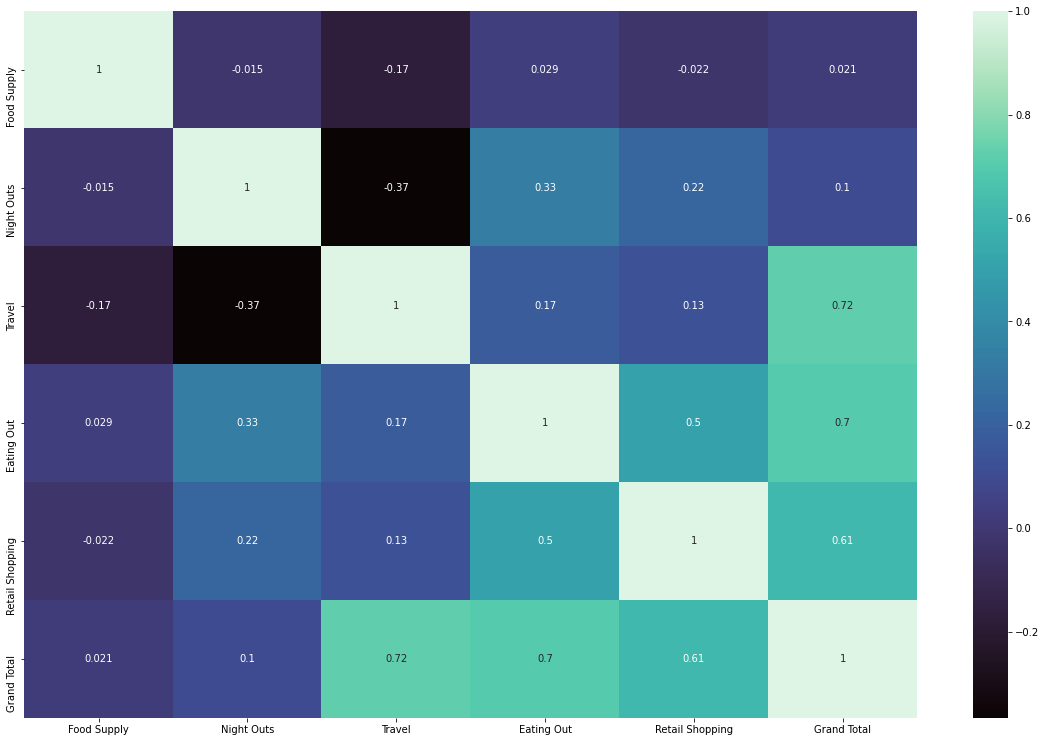

In [ ]:
cors = X2.corr('pearson')
plt.figure(figsize=(20,13))
sns.heatmap(cors,annot=True,cmap='mako')

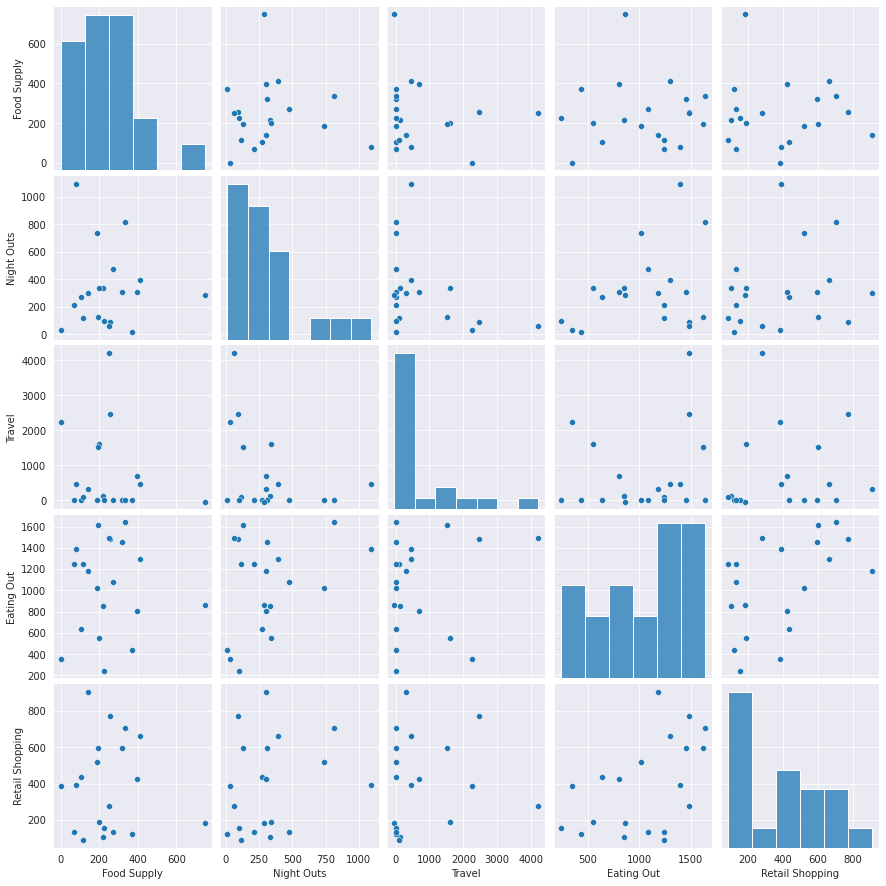

In [ ]:
sns.set_style('darkgrid')
sns.pairplot(X2)

In [ ]:
import pandas as pd 
import numpy as np 

from sklearn import linear_model
import statsmodels.api as sm

X3 = sm.add_constant(X3)
model = sm.OLS(Y,X3).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Grand Total   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     36.09
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           2.37e-07
Time:                        05:42:01   Log-Likelihood:                -153.70
No. Observations:                  20   AIC:                             315.4
Df Residuals:                      16   BIC:                             319.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3600.9050    405.563      8.879      0.000    2741.151    4460.659
Food Supply     1.0644      0.840      1.267      0.223      -0.717       2.846
Travel          0.8454      0.122      6.933      0.000       0.587       1.104
Eating Out      2.0200      0.317      6.370      0.000       1.348       2.692
==============================================================================
Omnibus:                        2.290   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.457
Skew:                          -0.412   Prob(JB):                        0.483
Kurtosis:                       1.966   Cond. No.                     4.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X3,Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
regr.get_params()
regr.score(X3,Y)


Intercept: 
 [3600.90495633]
Coefficients: 
 [[1.06435802 0.8453695  2.02001149]]


0.8712398020964159